<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/BTC_USD_PREDICTION_WITH_INDICATORS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install pandas_ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas_datareader as web
import pandas_ta as ta # This should work now that the library is installed
data = yf.download(tickers = 'BTC-USD', start = '2019-01-1', end = dt.datetime.now()) # Changed ticker to 'BTC-USD' and removed quotes around dt.datetime.now()

[*********************100%***********************]  1 of 1 completed


In [51]:
data = yf.download(tickers = 'BTC-USD', start = '2019-01-1', end = dt.datetime.now())

[*********************100%***********************]  1 of 1 completed


In [52]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,59185.226562,59205.511719,57501.339844,58192.507812,58192.507812,32032822113
2024-09-17,58192.507812,61316.089844,57628.070312,60308.539062,60308.539062,38075570118
2024-09-18,60309.000000,61664.066406,59218.253906,61649.679688,61649.679688,40990702891
2024-09-19,61651.156250,63872.441406,61609.867188,62940.457031,62940.457031,42710252573
2024-09-21,63199.535156,63279.687500,62826.542969,63119.339844,63119.339844,27260596224


In [53]:
#adding indicators
data['RSI'] = ta.rsi(data['Close'], length = 15)
data['EMAF']=ta.ema(data.Close, lenght = 15)
data['EMAM']=ta.ema(data.Close, lenght = 100)
data['EMAS']=ta.ema(data.Close, lenght = 200)

In [54]:
data['Target'] = data['Adj Close']-data['Open']
data['Target'] = data['Target'].shift(-1)

In [55]:
data['Target'] = [1 if data['Target'][i]>0 else 0 for i in range(len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace = True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis = 1, inplace = True)

<ipython-input-55-417c3867b20e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Target'] = [1 if data['Target'][i]>0 else 0 for i in range(len(data))]


In [56]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)
data.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,3631.509766,3685.777100,3624.673340,3655.006836,40.418236,3728.807152,3728.807152,3728.807152,1,3678.563965
1,3651.871094,3680.135986,3621.960938,3678.563965,42.189659,3719.672027,3719.672027,3719.672027,0,3657.839355
2,3677.990479,3682.520020,3637.080811,3657.839355,41.039551,3708.429723,3708.429723,3708.429723,1,3728.568359
3,3652.377930,3758.533447,3652.377930,3728.568359,46.383984,3712.091293,3712.091293,3712.091293,0,3601.013672
4,3725.446045,3743.387939,3583.019531,3601.013672,39.470790,3691.895362,3691.895362,3691.895362,0,3576.032471


In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00330281 0.00366644 0.0034389  ... 0.00396856 1.         0.00400511]
 [0.00359503 0.00358622 0.00339898 ... 0.00383017 0.         0.0037077 ]
 [0.00396989 0.00362012 0.00362152 ... 0.00365985 1.         0.0047227 ]
 ...
 [0.78634766 0.82318537 0.79827194 ... 0.83665694 1.         0.83591907]
 [0.81672299 0.82813369 0.82167659 ... 0.84479998 1.         0.85444236]
 [0.83598526 0.85953739 0.85687684 ... 0.85501787 0.         0.85700941]]


In [58]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
  X.append([])
  for i in range(backcandles, data_set_scaled.shape[0]):
    X[j].append(data_set_scaled[i-backcandles:i, j])
X=np.moveaxis(X, [0], [2]) # Move this line outside the loops to avoid converting X to a NumPy array within the loop
X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y=np.reshape(yi,(len(yi), 1))
print(X.shape)
print(y.shape)

[[0.00330281 0.00366644 0.0034389  ... 0.00396856 1.         0.00400511]
 [0.00359503 0.00358622 0.00339898 ... 0.00383017 0.         0.0037077 ]
 [0.00396989 0.00362012 0.00362152 ... 0.00365985 1.         0.0047227 ]
 ...
 [0.78634766 0.82318537 0.79827194 ... 0.83665694 1.         0.83591907]
 [0.81672299 0.82813369 0.82167659 ... 0.84479998 1.         0.85444236]
 [0.83598526 0.85953739 0.85687684 ... 0.85501787 0.         0.85700941]]
2074
(2044, 30, 8)
(2044, 1)


In [59]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1635
(1635, 30, 8)
(409, 30, 8)
(1635, 1)
(409, 1)


In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense

import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout, Activation, concatenate

In [61]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0160 - val_loss: 0.0027
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.4292e-04 - val_loss: 0.0013
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.5743e-04 - val_loss: 0.0012
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 7.2808e-04 - val_loss: 0.0016
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 6.8771e-04 - val_loss: 0.0011
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 6.6405e-04 - val_loss: 0.0014
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 6.7092e-04 - val_loss: 0.0010
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 5.9964e-04 - val_loss: 0.0019
Epoch 9/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 7.4569e-04 - val_loss: 9.8176e-04
Epoch 10/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 5.8675e-04 - val_loss: 0.0011
Epoch 11/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 5.4395e-04 - val_loss: 0.00

In [62]:
y_pred = model.predict(X_test)
for i in range(10):
  print(y_pred[i], y_test[i])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.37067884] [0.37543786]
[0.3906035] [0.373545]
[0.3808144] [0.37308755]
[0.3726533] [0.37334944]
[0.37056017] [0.3714401]
[0.37182963] [0.37324151]
[0.36770415] [0.36982472]
[0.37339136] [0.36310053]
[0.36495626] [0.3338653]
[0.35089406] [0.32503983]


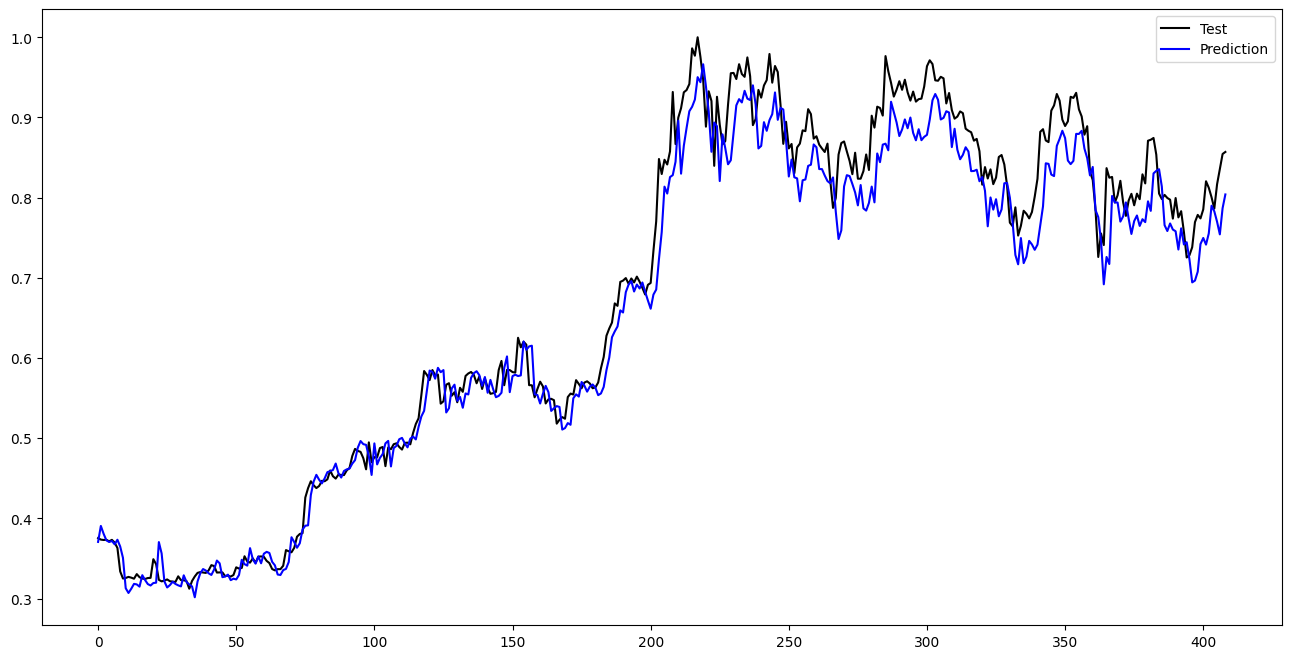

In [63]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'blue', label = 'Prediction')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/30


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 9.3518e-04 - val_loss: 0.0017
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 7.6088e-04 - val_loss: 0.0011
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 7.8326e-04 - val_loss: 0.0017
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 6.9780e-04 - val_loss: 0.0034
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 7.0055e-04 - val_loss: 0.0011
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 6.6971e-04 - val_loss: 0.0014
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.8460e-04 - val_loss: 0.0015
Epoch 12/30
100/100 ━━━━

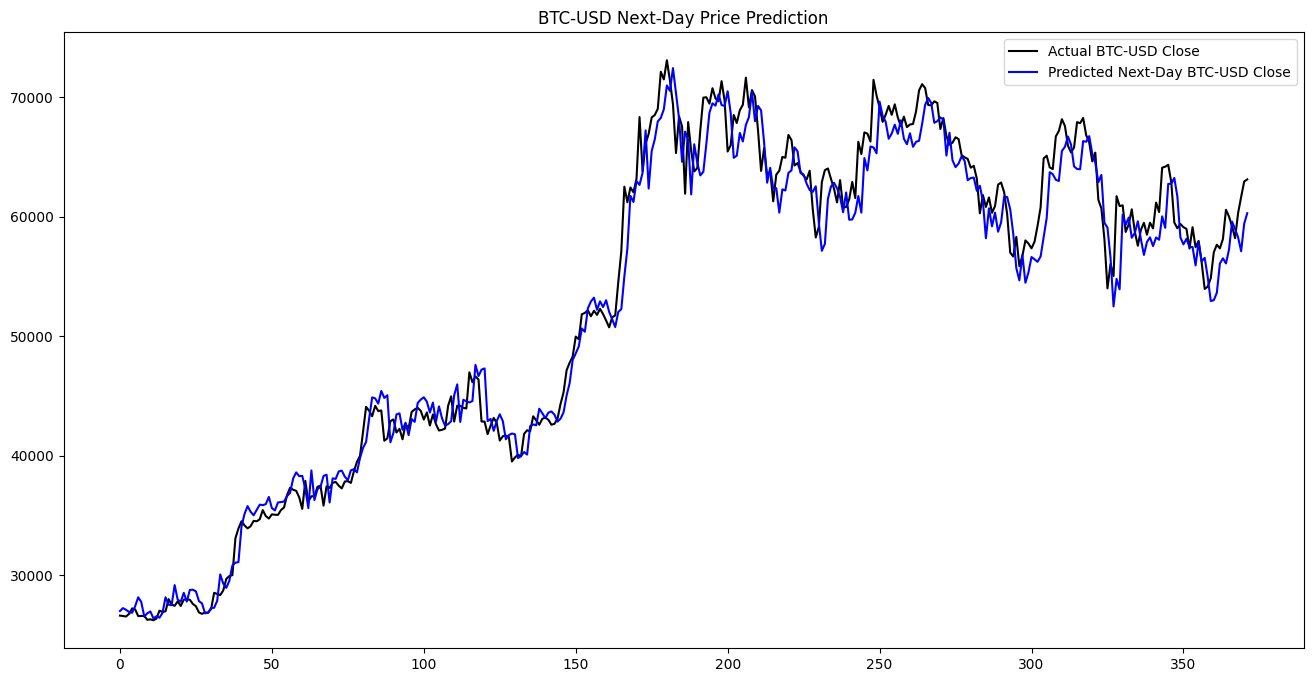

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Activation
from keras.optimizers import Adam

# Fetch data
data = yf.download(tickers='BTC-USD', start='2019-01-01', end=dt.datetime.now())

# Adding indicators
data['RSI'] = ta.rsi(data['Close'], length=15)
data['EMAF'] = ta.ema(data['Close'], length=15)
data['EMAM'] = ta.ema(data['Close'], length=100)
data['EMAS'] = ta.ema(data['Close'], length=200)

# Drop rows with missing values
data.dropna(inplace=True)

# Setting target for next-day prediction
data['TargetNextDayClose'] = data['Adj Close'].shift(-1)  # Predicting next day's close
data.dropna(inplace=True)

# Select relevant features for prediction
data_set = data[['Open', 'High', 'Low', 'Adj Close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'TargetNextDayClose']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(data_set)

# Prepare data for LSTM model
X = []
y = []

backcandles = 30  # Use the last 30 candles to predict
for i in range(backcandles, data_set_scaled.shape[0]):
    X.append(data_set_scaled[i - backcandles:i, :-1])  # All features except target
    y.append(data_set_scaled[i, -1])  # Next day's target (shifted)

X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
split_limit = int(len(X) * 0.8)
X_train, X_test = X[:split_limit], X[split_limit:]
y_train, y_test = y[:split_limit], y[split_limit:]

# Build LSTM model
lstm_input = Input(shape=(backcandles, X.shape[2]), name='lstm_input')
x = LSTM(150, name='first_layer')(lstm_input)
x = Dense(1, name='dense_layer')(x)
output = Activation('linear', name='output')(x)

model = Model(inputs=lstm_input, outputs=output)
adam = Adam()
model.compile(optimizer=adam, loss='mse')

# Train the model
model.fit(X_train, y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

# Predict
y_pred = model.predict(X_test)

# Inverse transform the predictions to get the actual price
predicted_prices = np.zeros((len(y_pred), data_set_scaled.shape[1]))  # Create an empty array for inverse scaling
predicted_prices[:, -1] = y_pred.flatten()  # Flatten y_pred to 1D
predicted_prices = scaler.inverse_transform(predicted_prices)[:, -1]  # Inverse scale and get the predicted prices

# Inverse transform actual y_test values
y_test_actual = np.zeros((len(y_test), data_set_scaled.shape[1]))
y_test_actual[:, -1] = y_test
y_test_actual = scaler.inverse_transform(y_test_actual)[:, -1]

# Plot results
plt.figure(figsize=(16, 8))
plt.plot(y_test_actual, color='black', label='Actual BTC-USD Close')
plt.plot(predicted_prices, color='blue', label='Predicted Next-Day BTC-USD Close')
plt.title('BTC-USD Next-Day Price Prediction')
plt.legend()
plt.show()


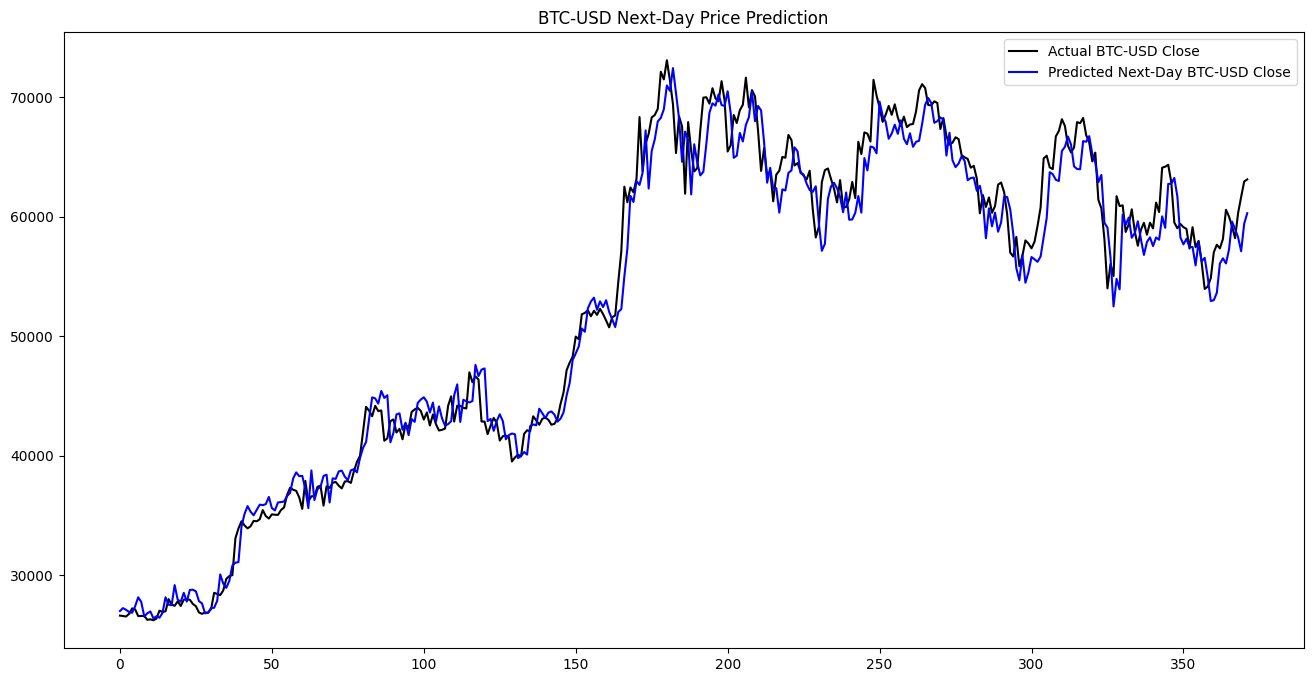

In [65]:
# Inverse transform the predictions to get the actual price
predicted_prices = np.zeros((len(y_pred), data_set_scaled.shape[1]))  # Create an empty array for inverse scaling
predicted_prices[:, -1] = y_pred.flatten()  # Flatten y_pred to 1D
predicted_prices = scaler.inverse_transform(predicted_prices)[:, -1]  # Inverse scale and get the predicted prices

# Inverse transform actual y_test values
y_test_actual = np.zeros((len(y_test), data_set_scaled.shape[1]))
y_test_actual[:, -1] = y_test
y_test_actual = scaler.inverse_transform(y_test_actual)[:, -1]

# Plot results
plt.figure(figsize=(16, 8))
plt.plot(y_test_actual, color='black', label='Actual BTC-USD Close')
plt.plot(predicted_prices, color='blue', label='Predicted Next-Day BTC-USD Close')
plt.title('BTC-USD Next-Day Price Prediction')
plt.legend()
plt.show()


In [66]:
# After model.fit and evaluating the test predictions

# Get the last available data point to predict the next day
last_data = data_set_scaled[-backcandles:, :-1] # Select all features except the last one
last_data = np.array([last_data])  # Reshape to match model input shape (1, backcandles, num_features)

# Predict the next day's price
predicted_next_day_scaled = model.predict(last_data)

# Inverse transform the predicted value to get the actual price
next_day_price_scaled = np.zeros((1, data_set_scaled.shape[1]))  # Create an empty array for inverse scaling
next_day_price_scaled[0, -1] = predicted_next_day_scaled  # Put the predicted value in the correct column
predicted_next_day_price = scaler.inverse_transform(next_day_price_scaled)[:, -1][0]  # Inverse transform and extract

# Print the predicted BTC-USD price for the next day
print(f"Predicted BTC-USD price for the next day: ${predicted_next_day_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted BTC-USD price for the next day: $61908.48


<ipython-input-66-28088e4f0577>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_day_price_scaled[0, -1] = predicted_next_day_scaled  # Put the predicted value in the correct column
